# **Model Analysis**


1.   [Tide](https://github.com/dbolya/tide)
2.   With Images


---



## Setup

Get the following files from github in the folder required_files:
- od.py
- visualize_bbox_on_result_img.py
- instances_val.json
- instances_val_iscrowd.json
- instances_val_iscrowd.json
- result_all_classes.json
- result_only_non-water.json

In [22]:
import os
os.mkdir("/content/annotations")
os.mkdir("/content/annotations/od_v2_annotations")

place the instances json files inside /content/annotations/od_v2_annotations
and the rest of the files inside /content

the file tree should be like this:
```
content
└───annotations
|   └───od_v2_annotations
|       |---instances_val.json
|       |---instances_val_iscrowd.json
|       |---instances_val_iscrowd_non_water.json
└───sample_data
│   │---...
|---od.py
|---result_all_classes.json
│---result_only_non-water.json
│---visualize_bbox_on_result_img.py
```

## Mean Average Precision Calculation:

In [13]:
!python od.py --file_name result_all_classes.json --v2

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.06s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.63s).
Accumulating evaluation results...
DONE (t=0.19s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.304
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.747
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.190
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.259
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.329
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.389
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.404
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [14]:
!python od.py --file_name result_all_classes.json_non-water --v2 --skip_sub_1

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.06s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.68s).
Accumulating evaluation results...
DONE (t=0.25s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.796
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.390
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.642
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.460
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [15]:
!python od.py --file_name result_only_non-water.json --v2 --skip_sub_1

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.06s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.69s).
Accumulating evaluation results...
DONE (t=0.25s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.421
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.812
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.385
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.288
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.394
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.478
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

Summarized:

| Model: | OD V2              | OD V2 Model on Binary OD V2 | Only Binary OD V2  |
|--------------------|--------------------|-----------------------------|--------------------|
| mAP | 0.3916125251495167 | 0.40679977540247153          | 0.42146983860850906 |

## Tide

first install the needed package

In [1]:
pip install tidecv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


and import all the needed packages

In [2]:
import json
import os
from tidecv import TIDE, datasets, Data

Our json files does not contain a mask, due to that we need to rewrite the COCO function, so that it does not except a mask key in the annotations.

In [3]:
def default_name(path:str) -> str:
    return os.path.splitext(os.path.basename(path))[0]

def COCO(path:str=None, name:str=None, year:int=2017, ann_set:str='val', force_download:bool=False) -> Data:
    """
    Loads ground truth from a COCO-style annotation file.
    """
    
    if name is None: name = default_name(path)
    
    with open(path, 'r') as json_file:
        cocojson = json.load(json_file)
    
    images = cocojson['images']
    anns   = cocojson['annotations']
    cats   = cocojson['categories'] if 'categories' in cocojson else None


    # Add everything from the coco json into our data structure
    data = Data(name, max_dets=100)

    image_lookup = {}

    for idx, image in enumerate(images):
        image_lookup[image['id']] = image
        data.add_image(image['id'], image['file_name'])

    if cats is not None:
        for cat in cats:
            data.add_class(cat['id'], cat['name'])

    for ann in anns:
        image  = ann['image_id']
        _class = ann['category_id']
        box    = ann['bbox']

        if ann['iscrowd']: data.add_ignore_region(image, _class, box)
        else:              data.add_ground_truth (image, _class, box)
    
    return data

Let's run Tide for the Object Detection V2 Dataset

-- result_all_classes --

bbox AP @ 50: 70.89

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     3.79     7.60     0.31     0.00     0.31    12.97  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       3.56      23.55  



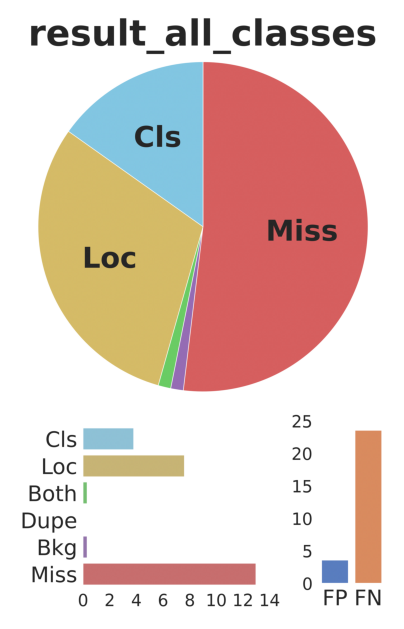

In [4]:
annotation = 'annotations/od_v2_annotations/instances_val_iscrowd.json'
modelname = 'result_all_classes.json'

tide = TIDE()
tide.evaluate(COCO(path = annotation, name = "normal"), datasets.COCOResult(modelname), mode=TIDE.BOX) # Use TIDE.MASK for masks
tide.summarize()  # Summarize the results as tables in the console
tide.plot()       # Show a summary figure. Specify a folder and it'll output a png to that folder.

Now lets run Tide with the same model for Binary Object Detection Dataset

-- result_all_classes --

bbox AP @ 50: 0.00

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP    13.86     0.00     0.00     0.00     0.00     0.00  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       0.00       0.00  



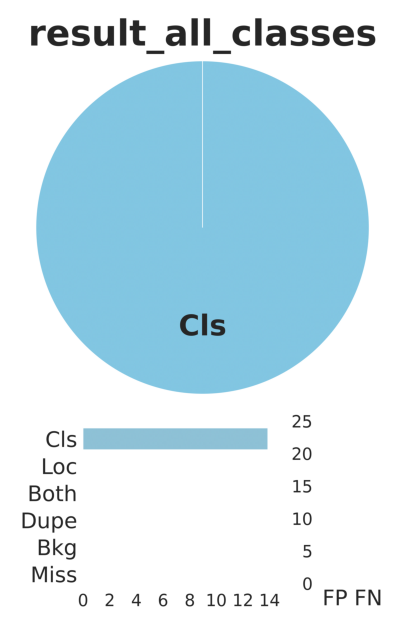

In [5]:
annotation = 'annotations/od_v2_annotations/instances_val_iscrowd_non_water.json'
modelname = 'result_all_classes.json'

tide = TIDE()
tide.evaluate(COCO(path = annotation, name = "normal"), datasets.COCOResult(modelname), mode=TIDE.BOX) # Use TIDE.MASK for masks
tide.summarize()  # Summarize the results as tables in the console
tide.plot()       # Show a summary figure. Specify a folder and it'll output a png to that folder.

And finally lets run Tide for the model, which is only trained for Binary Object Detection V2

-- result_only_non-water --

bbox AP @ 50: 81.23

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00    12.30     0.00     0.00     0.41     4.70  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       3.92      14.10  



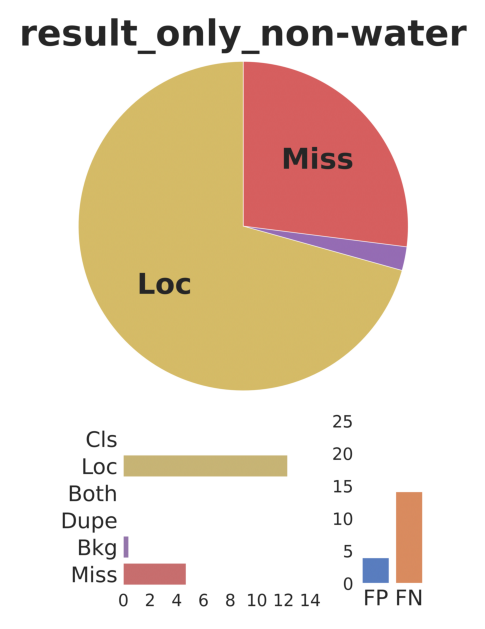

In [6]:
annotation = 'annotations/od_v2_annotations/instances_val_iscrowd_non_water.json'
modelname = 'result_only_non-water.json'

tide = TIDE()
tide.evaluate(COCO(path = annotation, name = "normal"), datasets.COCOResult(modelname), mode=TIDE.BOX) # Use TIDE.MASK for masks
tide.summarize()  # Summarize the results as tables in the console
tide.plot()       # Show a summary figure. Specify a folder and it'll output a png to that folder.

## Images

In [16]:
import requests
import zipfile
import os

url = 'https://cloud.cs.uni-tuebingen.de/index.php/s/ZZxX65FGnQ8zjBP/download?path=%2FCompressed%20Version%2Fimages%2Fval&files=%5B%22393.jpg%22%2C%221506.jpg%22%2C%222636.jpg%22%2C%22868.jpg%22%5D&downloadStartSecret=on1u7kcylw'
r = requests.get(url)
if not os.path.exists("content/sample_data/images"):
  os.mkdir("/content/sample_data/images")
with open("/content/sample_data/img.zip", 'wb') as f:
    f.write(r.content)

with zipfile.ZipFile("sample_data/img.zip", 'r') as myzip:
    myzip.extractall("sample_data/images")

<p float="left">
  <img src="https://cloud.cs.uni-tuebingen.de/index.php/apps/files_sharing/publicpreview/ZZxX65FGnQ8zjBP?file=/Compressed%20Version/images/test/3.jpg&fileId=12305487&x=1920&y=1080&a=true" width="500" />
  <img src="https://cloud.cs.uni-tuebingen.de/index.php/apps/files_sharing/publicpreview/ZZxX65FGnQ8zjBP?file=/Compressed%20Version/images/test/4.jpg&fileId=12305743&x=1920&y=1080&a=true" width="500" /> 
  <img src="https://cloud.cs.uni-tuebingen.de/index.php/apps/files_sharing/publicpreview/ZZxX65FGnQ8zjBP?file=/Compressed%20Version/images/test/373.jpg&fileId=12305561&x=1920&y=1080&a=true" width="500" />
  <img src="https://cloud.cs.uni-tuebingen.de/index.php/apps/files_sharing/publicpreview/ZZxX65FGnQ8zjBP?file=/Compressed%20Version/images/test/377.jpg&fileId=12305263&x=1920&y=1080&a=true" width="500" />
</p>

In [ ]:
# right now it grabs the wrong visualize script
!wget https://raw.githubusercontent.com/Ben93kie/SeaDronesSee/main/OD/visualize_bbox_on_img.py

--2022-09-20 13:33:04--  https://raw.githubusercontent.com/Ben93kie/SeaDronesSee/main/OD/visualize_bbox_on_img.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2951 (2.9K) [text/plain]
Saving to: ‘visualize_bbox_on_img.py’

visualize_bbox_on_i 100%[===================>]   2.88K  --.-KB/s    in 0s      

2022-09-20 13:33:04 (50.6 MB/s) - ‘visualize_bbox_on_img.py’ saved [2951/2951]



In [19]:
import os
if not os.path.exists("/content/sample_data/output"):
  os.mkdir("/content/sample_data/output")
!pip install opencv-python
!python /content/visualize_bbox_on_result_img.py --annotation /content/result_all_classes.json --pictures /content/sample_data/images --output /content/sample_data/output
!python /content/visualize_bbox_on_result_img.py --annotation /content/result_only_non-water.json --pictures /content/sample_data/images --output /content/sample_data/output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Picture generation took 0.334460973739624 second! Finished: 32.42%
Picture generation took 0.31448864936828613 second! Finished: 32.43%
Picture generation took 0.32283449172973633 second! Finished: 32.44%
Picture generation took 0.32213473320007324 second! Finished: 32.45%
Picture generation took 0.32205677032470703 second! Finished: 32.46%
Picture generation took 0.33203125 second! Finished: 32.47%
Picture generation took 0.34418559074401855 second! Finished: 43.95%
Picture generation took 0.3346576690673828 second! Finished: 43.96%
Picture generation took 0.3259284496307373 second! Finished: 43.97%
Picture generation took 0.31998133659362793 second! Finished: 43.98%
Picture generation took 0.33109116554260254 second! Finished: 43.99%
Picture generation took 0.3184807300567627 second! Finished: 44.01%
Picture generation took 0.3321549892425537 second! Finished: 44.02%
Picture generation 

In [20]:
import IPython.display as display
import ipywidgets as widgets

img_width = 1920
img_height = 1080
img1=open('/content/sample_data/output/Output0/393.jpg','rb').read()
wi11 = widgets.Image(value=img1, format='jpg', width=img_width, height=img_height)
img2=open('/content/sample_data/output/Output0/868.jpg','rb').read()
wi12 = widgets.Image(value=img2, format='jpg', width=img_width, height=img_height)
img3=open('/content/sample_data/output/Output0/1506.jpg','rb').read()
wi13 = widgets.Image(value=img3, format='jpg', width=img_width, height=img_height)
img4=open('/content/sample_data/output/Output0/2636.jpg','rb').read()
wi14 = widgets.Image(value=img4, format='jpg', width=img_width, height=img_height)
title1 = widgets.Label('trained on OD v2 and Binary OD')

img1=open('/content/sample_data/output/Output1/393.jpg','rb').read()
wi21 = widgets.Image(value=img1, format='jpg', width=img_width, height=img_height)
img2=open('/content/sample_data/output/Output1/868.jpg','rb').read()
wi22 = widgets.Image(value=img2, format='jpg', width=img_width, height=img_height)
img3=open('/content/sample_data/output/Output1/1506.jpg','rb').read()
wi23 = widgets.Image(value=img3, format='jpg', width=img_width, height=img_height)
img4=open('/content/sample_data/output/Output1/2636.jpg','rb').read()
wi24 = widgets.Image(value=img4, format='jpg', width=img_width, height=img_height)
title2 = widgets.Label('trained only on Binary OD')

items = [title1, title2, wi11, wi21, wi12, wi22, wi13, wi23, wi14, wi24]
widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(2, 500px)"))

GridBox(children=(Label(value='trained on OD v2 and Binary OD'), Label(value='trained only on Binary OD'), Ima…

As you can see, there are some swimmers the Binary OD Model can not detect. For example on the images in the second row and the images in the third row.